In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

import numpy as np
import matplotlib.pyplot as plt
import quantities as pq
from operator import itemgetter
import matplotlib.ticker as mtick
from edog.tools import*
from edog.plot import*

filename = "params.yaml"
params = parse_parameters(filename)

nt, nr, dt, dr = itemgetter("nt", "nr", "dt", "dr")(params["grid"])
stim_delay, duration, patch_diameter = itemgetter("delay", "duration", "patch_diameter")(params["stimulus"])

A_g, a_g, B_g, b_g = itemgetter("A", "a", "B", "b")(params["ganglion"])
phase, damping, delay_g = itemgetter("phase", "damping", "delay")(params["ganglion"])

w_rg, A_rg, a_rg = itemgetter("w", "A", "a")(params["relay"]["Krg"])
tau_rg, delay_rg = itemgetter("tau", "delay")(params["relay"]["Krg"])

w_rig, A_rig, a_rig = itemgetter("w", "A", "a")(params["relay"]["Krig"])
tau_rig, delay_rig = itemgetter("tau", "delay")(params["relay"]["Krig"])

w_rc_ex, A_rc_ex, a_rc_ex = itemgetter("w", "A", "a")(params["relay"]["Krc_ex"])
tau_rc_ex, delay_rc_ex = itemgetter("tau", "delay")(params["relay"]["Krc_ex"])

w_rc_in, A_rc_in, a_rc_in = itemgetter("w", "A", "a")(params["relay"]["Krc_in"])
tau_rc_in, delay_rc_in = itemgetter("tau", "delay")(params["relay"]["Krc_in"])

w_rc_mix = itemgetter("w")(params["relay"]["Krc_mix"])
A_rc_mix_in, a_rc_mix_in = itemgetter("A", "a")(params["relay"]["Krc_mix"]["Krc_in"])
tau_rc_mix_in = itemgetter("tau")(params["relay"]["Krc_mix"]["Krc_in"])
A_rc_mix_ex, a_rc_mix_ex = itemgetter("A", "a")(params["relay"]["Krc_mix"]["Krc_ex"])
tau_rc_mix_ex = itemgetter("tau")(params["relay"]["Krc_mix"]["Krc_ex"])

delayed_in, delayed_ex = itemgetter("delayed_in", "delayed_ex")(params["relay"]["Krc_mix"])
stim_off_index = round(duration / dt).astype(int)

size_tuning = {"fb_ex": {}, "fb_in": {}, "fb_mix": {}}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Feedback excitation

In [23]:
for delay in delay_rc_ex:
    print("temporal delay:", delay)

    cen_size = np.zeros([len(nt), len(dt), len(w_rc_ex)])
    supp_index = np.zeros([len(nt), len(dt), len(w_rc_ex)])

    for k, n in enumerate(nt):
        for j, d in enumerate(dt):
            print("nt={}, dt={}, dw={}, w_max={}".format(n, round(d, 2), 
                                                         round(2*np.pi/(2**n*d), 4), 
                                                         round(np.pi/d), 2))
            for i, w in enumerate(w_rc_ex):
                network = create_spatiotemporal_network(nt=n, nr=nr, dt=d, dr=dr,
                                                        A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                                        phase=phase, damping=damping, delay_g=delay_g,
                                                        w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                                        tau_rg=tau_rg, delay_rg=delay_rg,
                                                        w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                                        tau_rig=tau_rig, delay_rig=delay_rig,
                                                        w_rc_ex=w, A_rc_ex=A_rc_ex, a_rc_ex=a_rc_ex,
                                                        tau_rc_ex=tau_rc_ex, delay_rc_ex=delay)

                spatiotemporal_tuning = spatiotemporal_size_tuning_flash(network=network, 
                                                                         patch_diameter=patch_diameter,
                                                                         delay=stim_delay,
                                                                         duration=duration)

                tuning_curve = np.mean(spatiotemporal_tuning[:stim_off_index[j], :], axis=0)

                cen_size[k, j, i] = rf_center_size(tuning_curve, patch_diameter)
                supp_index[k, j, i] = compute_suppression_index(tuning_curve)

    size_tuning["fb_ex"][float(delay.magnitude)] = {"cen_size": cen_size,  "supp_index": supp_index}

temporal delay: 5.0 ms
nt=10.0, dt=1.0 ms, dw=0.0061 1/ms, w_max=3.0 1/ms
nt=10.0, dt=1.5 ms, dw=0.0041 1/ms, w_max=2.0 1/ms
nt=10.0, dt=2.0 ms, dw=0.0031 1/ms, w_max=2.0 1/ms
nt=11.0, dt=1.0 ms, dw=0.0031 1/ms, w_max=3.0 1/ms
nt=11.0, dt=1.5 ms, dw=0.002 1/ms, w_max=2.0 1/ms
nt=11.0, dt=2.0 ms, dw=0.0015 1/ms, w_max=2.0 1/ms
nt=12.0, dt=1.0 ms, dw=0.0015 1/ms, w_max=3.0 1/ms
nt=12.0, dt=1.5 ms, dw=0.001 1/ms, w_max=2.0 1/ms
nt=12.0, dt=2.0 ms, dw=0.0008 1/ms, w_max=2.0 1/ms
temporal delay: 30.0 ms
nt=10.0, dt=1.0 ms, dw=0.0061 1/ms, w_max=3.0 1/ms
nt=10.0, dt=1.5 ms, dw=0.0041 1/ms, w_max=2.0 1/ms
nt=10.0, dt=2.0 ms, dw=0.0031 1/ms, w_max=2.0 1/ms
nt=11.0, dt=1.0 ms, dw=0.0031 1/ms, w_max=3.0 1/ms
nt=11.0, dt=1.5 ms, dw=0.002 1/ms, w_max=2.0 1/ms
nt=11.0, dt=2.0 ms, dw=0.0015 1/ms, w_max=2.0 1/ms
nt=12.0, dt=1.0 ms, dw=0.0015 1/ms, w_max=3.0 1/ms
nt=12.0, dt=1.5 ms, dw=0.001 1/ms, w_max=2.0 1/ms
nt=12.0, dt=2.0 ms, dw=0.0008 1/ms, w_max=2.0 1/ms


## Feedback inhibition

In [24]:
for delay in delay_rc_in:
    print("temporal delay:", delay)

    cen_size = np.zeros([len(nt), len(dt), len(w_rc_in)])
    supp_index = np.zeros([len(nt), len(dt), len(w_rc_in)])

    for k, n in enumerate(nt):
        for j, d in enumerate(dt):
            print("nt={}, dt={}, dw={}, w_max={}".format(n, round(d, 2), 
                                                         round(2*np.pi/(2**n*d), 4), 
                                                         round(np.pi/d), 2))
            for i, w in enumerate(w_rc_in):
                network = create_spatiotemporal_network(nt=n, nr=nr, dt=d, dr=dr,
                                                        A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                                        phase=phase, damping=damping, delay_g=delay_g,
                                                        w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                                        tau_rg=tau_rg, delay_rg=delay_rg,
                                                        w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                                        tau_rig=tau_rig, delay_rig=delay_rig,
                                                        w_rc_in=w, A_rc_in=A_rc_in, a_rc_in=a_rc_in,
                                                        tau_rc_in=tau_rc_in, delay_rc_in=delay)

                spatiotemporal_tuning = spatiotemporal_size_tuning_flash(network=network, 
                                                                         patch_diameter=patch_diameter,
                                                                         delay=stim_delay,
                                                                         duration=duration)

                tuning_curve = np.mean(spatiotemporal_tuning[:stim_off_index[j], :], axis=0)

                cen_size[k, j, i] = rf_center_size(tuning_curve, patch_diameter)
                supp_index[k, j, i] = compute_suppression_index(tuning_curve)

    size_tuning["fb_in"][float(delay.magnitude)] = {"cen_size": cen_size, "supp_index": supp_index}

temporal delay: 5.0 ms
nt=10.0, dt=1.0 ms, dw=0.0061 1/ms, w_max=3.0 1/ms
nt=10.0, dt=1.5 ms, dw=0.0041 1/ms, w_max=2.0 1/ms
nt=10.0, dt=2.0 ms, dw=0.0031 1/ms, w_max=2.0 1/ms
nt=11.0, dt=1.0 ms, dw=0.0031 1/ms, w_max=3.0 1/ms
nt=11.0, dt=1.5 ms, dw=0.002 1/ms, w_max=2.0 1/ms
nt=11.0, dt=2.0 ms, dw=0.0015 1/ms, w_max=2.0 1/ms
nt=12.0, dt=1.0 ms, dw=0.0015 1/ms, w_max=3.0 1/ms
nt=12.0, dt=1.5 ms, dw=0.001 1/ms, w_max=2.0 1/ms
nt=12.0, dt=2.0 ms, dw=0.0008 1/ms, w_max=2.0 1/ms
temporal delay: 30.0 ms
nt=10.0, dt=1.0 ms, dw=0.0061 1/ms, w_max=3.0 1/ms
nt=10.0, dt=1.5 ms, dw=0.0041 1/ms, w_max=2.0 1/ms
nt=10.0, dt=2.0 ms, dw=0.0031 1/ms, w_max=2.0 1/ms
nt=11.0, dt=1.0 ms, dw=0.0031 1/ms, w_max=3.0 1/ms
nt=11.0, dt=1.5 ms, dw=0.002 1/ms, w_max=2.0 1/ms
nt=11.0, dt=2.0 ms, dw=0.0015 1/ms, w_max=2.0 1/ms
nt=12.0, dt=1.0 ms, dw=0.0015 1/ms, w_max=3.0 1/ms
nt=12.0, dt=1.5 ms, dw=0.001 1/ms, w_max=2.0 1/ms
nt=12.0, dt=2.0 ms, dw=0.0008 1/ms, w_max=2.0 1/ms


## Mixed excitatory and inhibitory feedback

In [25]:
for params in [delayed_in, delayed_ex]:
    print("temporal delay:", params)

    cen_size = np.zeros([len(nt), len(dt), len(w_rc_mix)])
    supp_index = np.zeros([len(nt), len(dt), len(w_rc_mix)])

    for k, n in enumerate(nt):
        for j, d in enumerate(dt):
            print("nt={}, dt={}, dw={}, w_max={}".format(n, round(d, 2), 
                                                         round(2*np.pi/(2**n*d), 4), 
                                                         round(np.pi/d), 2))
            for i, w in enumerate(w_rc_mix):
                network = create_spatiotemporal_network(nt=n, nr=nr, dt=d, dr=dr,
                                                        A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                                        phase=phase, damping=damping, delay_g=delay_g,
                                                        w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                                        tau_rg=tau_rg, delay_rg=delay_rg,
                                                        w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                                        tau_rig=tau_rig, delay_rig=delay_rig,
                                                        w_rc_ex=w, A_rc_ex=A_rc_mix_ex, a_rc_ex=a_rc_mix_ex,
                                                        tau_rc_ex=tau_rc_mix_ex, delay_rc_ex=params["delay_ex"],
                                                        w_rc_in=w, A_rc_in=A_rc_mix_in, a_rc_in=a_rc_mix_in,
                                                        tau_rc_in=tau_rc_mix_in, delay_rc_in=params["delay_in"])

                spatiotemporal_tuning = spatiotemporal_size_tuning_flash(network=network, 
                                                                         patch_diameter=patch_diameter,
                                                                         delay=stim_delay,
                                                                         duration=duration)

                tuning_curve = np.mean(spatiotemporal_tuning[:stim_off_index[j], :], axis=0)

                cen_size[k, j, i] = rf_center_size(tuning_curve, patch_diameter)
                supp_index[k, j, i] = compute_suppression_index(tuning_curve)

    size_tuning["fb_mix"][float(params["delay_ex"].magnitude)] = {"cen_size": cen_size, 
                                                                  "supp_index": supp_index}

temporal delay: {'delay_in': array(30) * ms, 'delay_ex': array(5) * ms}
nt=10.0, dt=1.0 ms, dw=0.0061 1/ms, w_max=3.0 1/ms
nt=10.0, dt=1.5 ms, dw=0.0041 1/ms, w_max=2.0 1/ms
nt=10.0, dt=2.0 ms, dw=0.0031 1/ms, w_max=2.0 1/ms
nt=11.0, dt=1.0 ms, dw=0.0031 1/ms, w_max=3.0 1/ms
nt=11.0, dt=1.5 ms, dw=0.002 1/ms, w_max=2.0 1/ms
nt=11.0, dt=2.0 ms, dw=0.0015 1/ms, w_max=2.0 1/ms
nt=12.0, dt=1.0 ms, dw=0.0015 1/ms, w_max=3.0 1/ms
nt=12.0, dt=1.5 ms, dw=0.001 1/ms, w_max=2.0 1/ms
nt=12.0, dt=2.0 ms, dw=0.0008 1/ms, w_max=2.0 1/ms
temporal delay: {'delay_in': array(5) * ms, 'delay_ex': array(30) * ms}
nt=10.0, dt=1.0 ms, dw=0.0061 1/ms, w_max=3.0 1/ms
nt=10.0, dt=1.5 ms, dw=0.0041 1/ms, w_max=2.0 1/ms
nt=10.0, dt=2.0 ms, dw=0.0031 1/ms, w_max=2.0 1/ms
nt=11.0, dt=1.0 ms, dw=0.0031 1/ms, w_max=3.0 1/ms
nt=11.0, dt=1.5 ms, dw=0.002 1/ms, w_max=2.0 1/ms
nt=11.0, dt=2.0 ms, dw=0.0015 1/ms, w_max=2.0 1/ms
nt=12.0, dt=1.0 ms, dw=0.0015 1/ms, w_max=3.0 1/ms
nt=12.0, dt=1.5 ms, dw=0.001 1/ms, w_max=2.

-------------
## Convergence plots

<IPython.core.display.Javascript object>


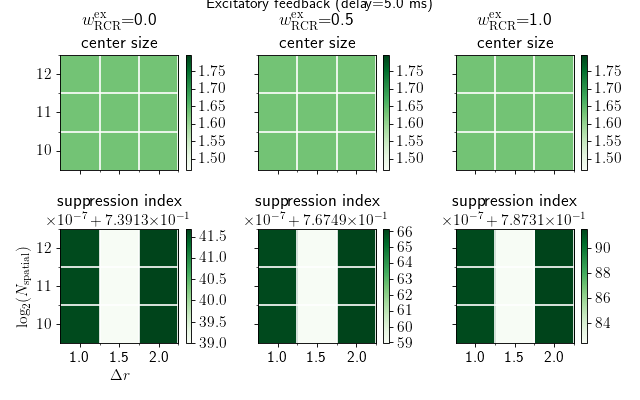

<IPython.core.display.Javascript object>


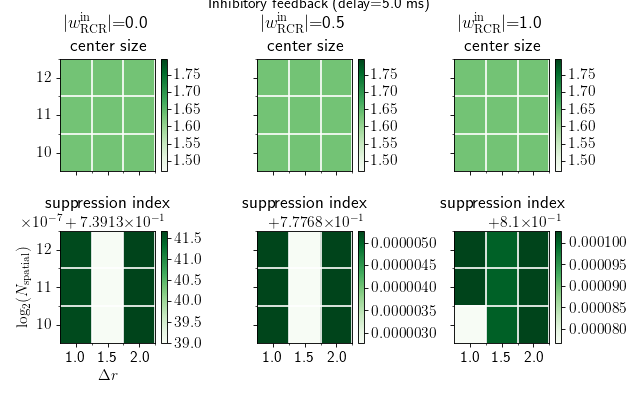

<IPython.core.display.Javascript object>


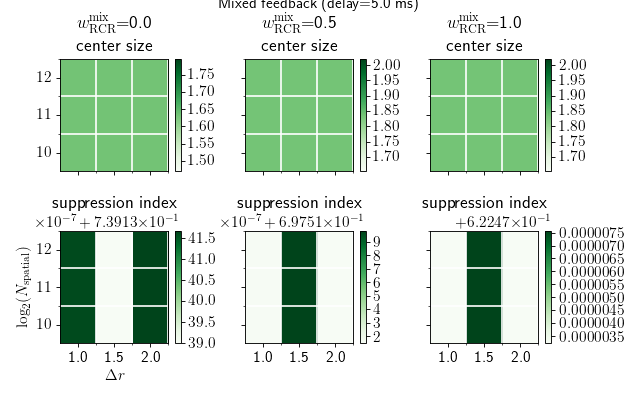

<IPython.core.display.Javascript object>


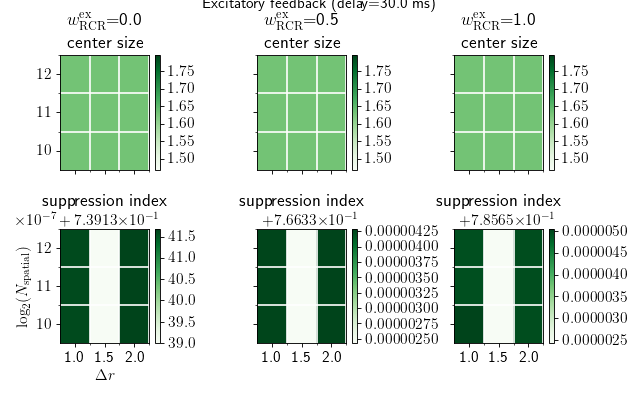

<IPython.core.display.Javascript object>


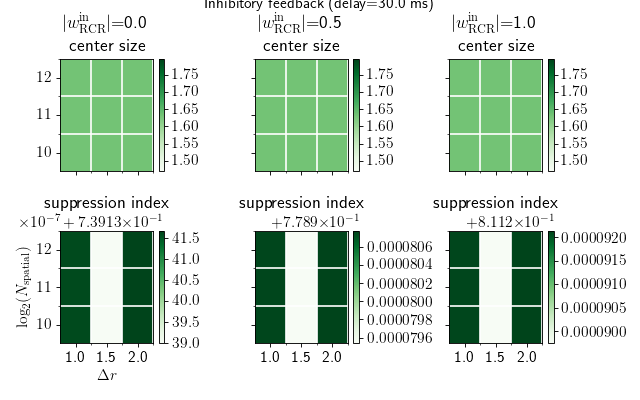

<IPython.core.display.Javascript object>


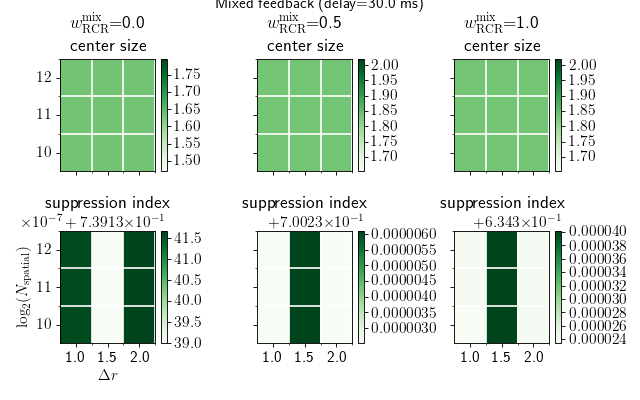

In [26]:
vmin_cs = 1
vmax_cs = 3
vmin_supp = 0
vmax_supp = 1
extent = [dt.min(), dt.max(), nt.min(), nt.max()]
locs_dt = np.arange(0.0, len(dt))
locs_nt = np.arange(0.0, len(nt))
cmap = "Greens"

titles = ["Excitatory feedback", 
          "Inhibitory feedback", 
          "Mixed feedback"]

labels = [r"$w^\mathrm{ex}_{\mathrm{RCR}}$", 
          r"$|w^\mathrm{in}_{\mathrm{RCR}}|$", 
          r"$w^\mathrm{mix}_{\mathrm{RCR}}$"]


for m, delay in enumerate(delay_rc_ex):
    d_key = float(delay.magnitude)
    for i, (key, w_rc) in enumerate(zip(size_tuning.keys(), [w_rc_ex, w_rc_in, w_rc_mix])):
        fig, ax = plt.subplots(2, 3, figsize=(8, 5), sharex="col", sharey="row")
        plt.figtext(0.5, 0.99, "{} (delay={})".format(titles[i], round(delay, 2)),
                                                   va="center", ha="center")

        for j, w in enumerate(w_rc):
            ax[0, j].set_title(labels[i]+"={} \n center size".format(w))
            cax = ax[0, j].imshow(size_tuning[key][d_key]["cen_size"][:, :, j], 
                            aspect="auto", origin="lower", cmap=cmap)
            fig.colorbar(cax, ax=ax[0, j])

            ax[1, j].set_title("suppression index", y=1.15)
            cax = ax[1, j].imshow(size_tuning[key][d_key]["supp_index"][:, :, j], 
                            aspect="auto", origin="lower", cmap=cmap)
            fig.colorbar(cax, ax=ax[1, j])

            for ax1, ax2 in zip([ax[0, j].xaxis, ax[1, j].xaxis], 
                                [ax[0, j].yaxis, ax[1, j].yaxis]):
                ax1.set_ticks(locs_dt + 0.5, minor=True)
                ax1.set(ticks=locs_dt, ticklabels=dt.magnitude)

                ax2.set_ticks(locs_nt + 0.5, minor=True)
                ax2.set(ticks=locs_nt, ticklabels=[r"${}$".format(int(n)) for n in nt])

            ax[0, j].grid(which='minor', color='w', linestyle='-', linewidth=1.5)
            ax[1, j].grid(which='minor', color='w', linestyle='-', linewidth=1.5)


        ax[1, 0].set_ylabel(r"$\log_2(N_\mathrm{spatial})$")
        ax[1, 0].set_xlabel(r"$\Delta r$")  

        fig.tight_layout()
